<a href="https://colab.research.google.com/github/Pallavisuma/CMPE257-Fall23-PallaviSuma-Kurmala/blob/homework-2/HW2_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [255]:
#### CREDITS: Wencen Wu ####
import numpy as np

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep

    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []

    # parameters
    r1 = rad + thk
    r2 = rad

    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)

        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

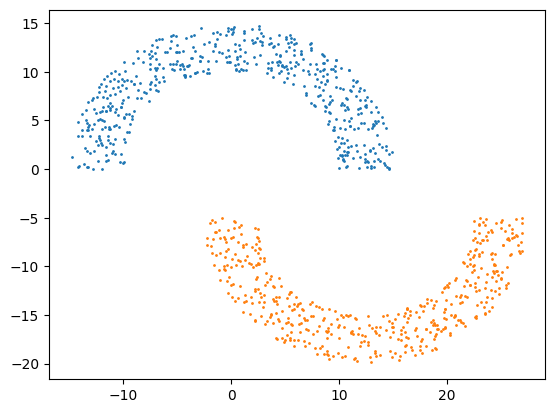

In [256]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

In [257]:

import pandas as pd
data_source1=pd.DataFrame(top, columns=["X1","X2"])

data_source1["Y"]=1
#print(data_source1.head())

data_source2=pd.DataFrame(bottom,columns=["X1","X2"])
data_source2["Y"]=-1
#print(data_source2.head())
data_source=pd.concat([data_source1,data_source2],ignore_index=True)



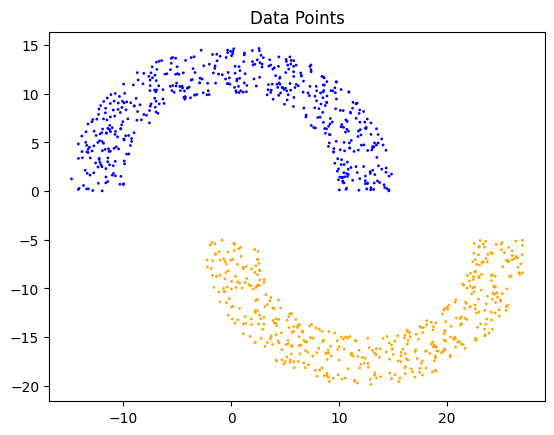

In [258]:
import matplotlib.pyplot as plt

# Define the colors based on the target variable values
colors = ['blue' if i == 1 else 'orange' for i in data_source.Y]

# Create a scatter plot with the specified colors
plt.scatter(data_source.X1, data_source.X2, s=1, c=colors)
plt.title("Data Points")

plt.show()


In [259]:
data_source['X0'] = 1
X = data_source[['X0', 'X1', 'X2']].values
Y = data_source['Y'].values
times, features = X.shape

def plaalgo(X, Y, num_iter=1000):

    weights = np.zeros(X.shape[1])
    for i in range(num_iter):
        misclass = 0
        for j in range(len(X)):
            if Y[j] * np.dot(X[j], weights) <= 0:
                weights += Y[j] * X[j]
                misclass += 1
        if misclass == 0:
            break

        print(f"iteration:{i+1} , weights{weights}, Number of misclass: {misclass}")

    return weights, misclass

weights,misclass = plaalgo(X, Y)

def compute(weights, X, Y):
    predict = np.sign(np.dot(X, weights))
    accuracy = np.mean(predict == Y)
    return accuracy
accuracy=compute(weights,X,Y)


print(f"Best Weights: {weights}, Number of misclass: {misclass}")
print(f"Accuracy: {accuracy*100} %")

iteration:1 , weights[19.          0.23577815 40.59122465], Number of misclass: 19
Best Weights: [19.          0.23577815 40.59122465], Number of misclass: 0
Accuracy: 100.0 %


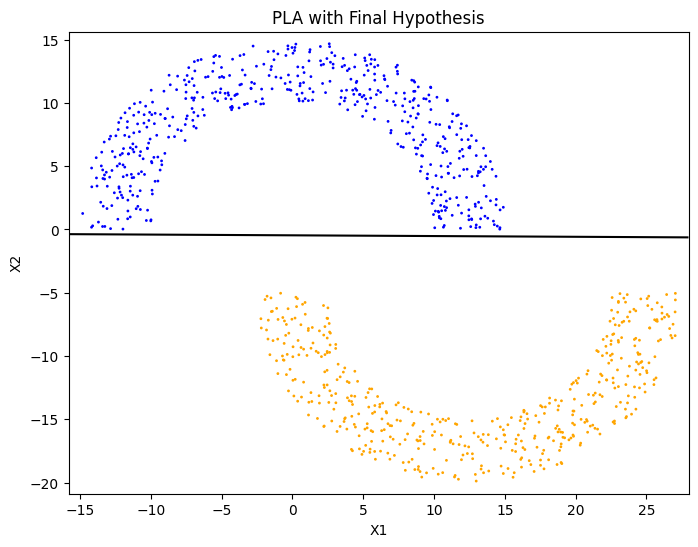

In [260]:
def plot(weights):
  X1 = data_source.X1
  X2 = data_source.X2
  labels = data_source.Y
  plt.figure(figsize=(8, 6))
  colors = ['blue' if i == 1 else 'orange' for i in data_source.Y]
  plt.scatter(data_source.X1, data_source.X2, s=1, c=colors)
  x1_min, x1_max = X1.min() - 1, X1.max() + 1
  x2_min, x2_max = X2.min() - 1, X2.max() + 1
  x, y = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
  Z = np.dot(np.c_[np.ones_like(x.ravel()), x.ravel(), y.ravel()], weights)
  Z = Z.reshape(x.shape)
  plt.contour(x, y, Z, levels=[0], colors="black", linestyles='-')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.title("PLA with Final Hypothesis")
  plt.show()
plot(weights)

In [261]:
X_T=np.transpose(X)
X_T_X=np.matmul(X_T,X)
X_inv=np.linalg.inv(X_T_X)
weights1=np.matmul(X_inv, X_T)
weights1=np.matmul(weights1,Y)
print(f"Weights from Linear Regression:{weights1}")

Weights from Linear Regression:[ 0.2649224  -0.00888631  0.07901304]


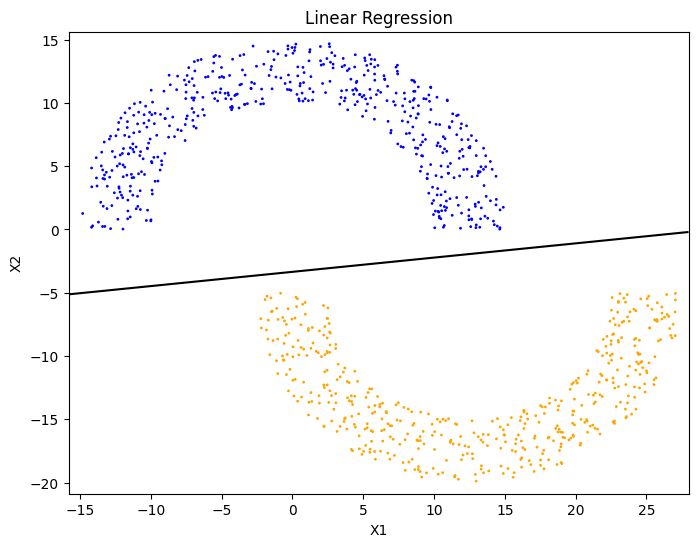

In [262]:
final_weights = weights1
X1 = data_source.X1
X2 = data_source.X2
labels = data_source.Y
plt.figure(figsize=(8, 6))
plt.scatter(data_source.X1, data_source.X2, s=1, c=colors)
x1_min, x1_max = X1.min() - 1, X1.max() + 1
x2_min, x2_max = X2.min() - 1, X2.max() + 1
x, y = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = np.dot(np.c_[np.ones_like(x.ravel()), x.ravel(), y.ravel()], weights1)
Z = Z.reshape(x.shape)
plt.contour(x, y, Z, levels=[0], colors="black", linestyles='-')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Linear Regression")
plt.show()

In linear regression, the target line represents the best-fit linear relationship between the features and the target variable. The goal of this line is to minimise the sum of squared differences between the predicted and actual target values.


In the PLA, the goal is binary classification, where you want to separate data points into two classes (e.g., +1 and -1).
The target line in the PLA represents the decision boundary that separates the two classes. This decision boundary is defined by a linear equation.


The difference in target line selection between linear regression and the PLA reflects the fundamental difference in their goals. Linear regression models and predicts continuous values, whereas the PLA divides data into two discrete classes based on a binary decision boundary. Each algorithm's target line selection corresponds to these specific goals.


As you can see both the PLA and Linear Regression got classified the data 100 % and have 100% accuracy

LP2


a- If we run PLA for non linearly seperable data the PLA goes on updating the weights vectors , continously as it doesnt find a line  where all missclasified are 0 so , it doesnt produce any weights and pla goes on runnning.

LP2- B

In [263]:
data_source100=pd.DataFrame(top1, columns=["X1","X2"])

data_source100["Y"]=1
#print(data_source1.head())

data_source200=pd.DataFrame(bottom1,columns=["X1","X2"])
data_source200["Y"]=-1
#print(data_source2.head())
new_data_source=pd.concat([data_source100,data_source200],ignore_index=True)
new_data_source['X0'] = 1
X_n = new_data_source[['X0', 'X1', 'X2']].values
Y_n = new_data_source['Y'].values
times, features = X_n.shape
weights_n,misclass_n = plaalgo(X_n, Y_n,1000)
def compute(weights_n, X_n, Y_n):
    predict = np.sign(np.dot(X_n, weights_n))
    accuracy = np.mean(predict == Y_n)
    return accuracy
accuracy=compute(weights_n,X_n,Y_n)


print(f"Best Weights: {weights_n}, Number of misclass: {misclass_n}")
print(f"Accuracy: {accuracy*100} %")

iteration:1 , weights[-16.          -7.91737627  -4.06026463], Number of misclass: 26
iteration:2 , weights[-23.        -13.4457646  -5.8111599], Number of misclass: 51
iteration:3 , weights[-26.         -14.63491441  -6.08760646], Number of misclass: 55
iteration:4 , weights[-26.         -16.39697887  -5.79059422], Number of misclass: 52
iteration:5 , weights[-26.         -16.03859333  -7.58375701], Number of misclass: 52
iteration:6 , weights[-27.         -16.36231062  -5.2466782 ], Number of misclass: 53
iteration:7 , weights[-28.         -15.43994658  -5.91491937], Number of misclass: 53
iteration:8 , weights[-27.         -16.18710791  -6.69847719], Number of misclass: 59
iteration:9 , weights[-28.         -15.79677802  -6.47280765], Number of misclass: 53
iteration:10 , weights[-26.         -15.04841789  -4.72536868], Number of misclass: 62
iteration:11 , weights[-26.         -17.25343328  -6.85262887], Number of misclass: 56
iteration:12 , weights[-26.         -16.03743849  -5.70

LP2 - B

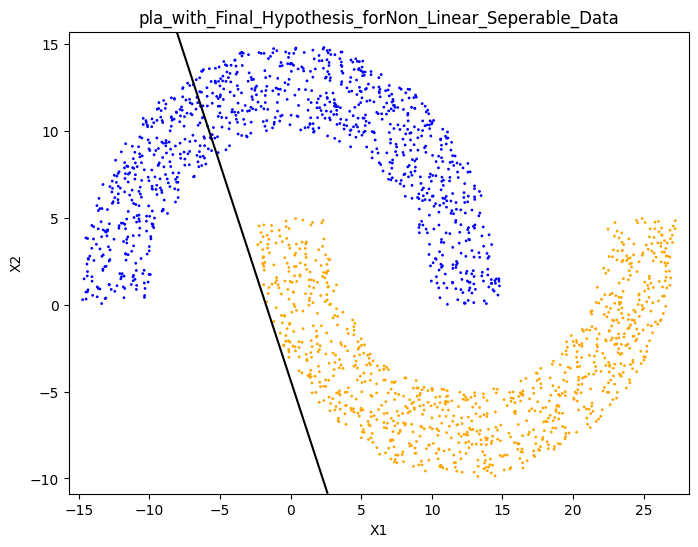

In [264]:
def plots(weights,title):
  X1 = new_data_source.X1
  X2 = new_data_source.X2
  labels = new_data_source.Y
  plt.figure(figsize=(8, 6))
  colors = ['blue' if i == 1 else 'orange' for i in new_data_source.Y]
  plt.scatter(new_data_source.X1, new_data_source.X2, s=1, c=colors)
  x1_min, x1_max = X1.min() - 1, X1.max() + 1
  x2_min, x2_max = X2.min() - 1, X2.max() + 1
  x, y = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
  Z = np.dot(np.c_[np.ones_like(x.ravel()), x.ravel(), y.ravel()], weights)
  Z = Z.reshape(x.shape)
  plt.contour(x, y, Z, levels=[0], colors="black", linestyles='-')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.title(title)
  plt.show()

plots(weights_n,"pla_with_Final_Hypothesis_forNon_Linear_Seperable_Data")

LP2 C

Final weights: [-62.           7.65732123  38.66002517]


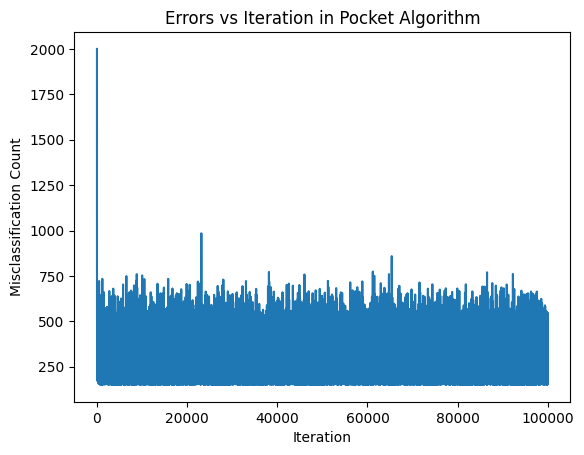

CPU times: user 3.63 s, sys: 104 ms, total: 3.74 s
Wall time: 3.67 s


In [265]:
%%time
def pocket_algorithm(X, Y, max_iterations):
    rows, variables = X.shape
    candidate_weights = np.zeros(variables)
    pocket_weights = np.zeros(variables)
    misclassified_ex = rows
    misclass_ex = []
    for iteration in range(max_iterations):
        predictions = np.sign(np.dot(X, candidate_weights))
        misclassified = np.where(predictions != Y)[0]
        if misclassified.size == 0:
            break
        random_misclassified = np.random.choice(misclassified)
        candidate_weights += Y[random_misclassified] * X[random_misclassified]
        misclass_size = misclassified.size
        misclass_ex.append(misclass_size)
        if misclass_size < misclassified_ex:
            misclassified_ex = misclass_size
            pocket_weights = candidate_weights.copy()
    return pocket_weights, misclass_ex

# Train the Pocket Algorithm and collect errors at each iteration
max_iterations = 100000
final_weights, error_counts = pocket_algorithm(X_n, Y_n, max_iterations)
print("Final weights:", final_weights)

# Plot errors vs. iteration
y=[i for i in error_counts]
x=[i for i in range(1,100001)]

plt.plot(range(len(error_counts)), error_counts, linestyle='-')
#plt.plot(x,y)
#plt.ylim(500,2000)
plt.xlabel("Iteration")
plt.ylabel("Misclassification Count")
plt.title("Errors vs Iteration in Pocket Algorithm")
plt.show()


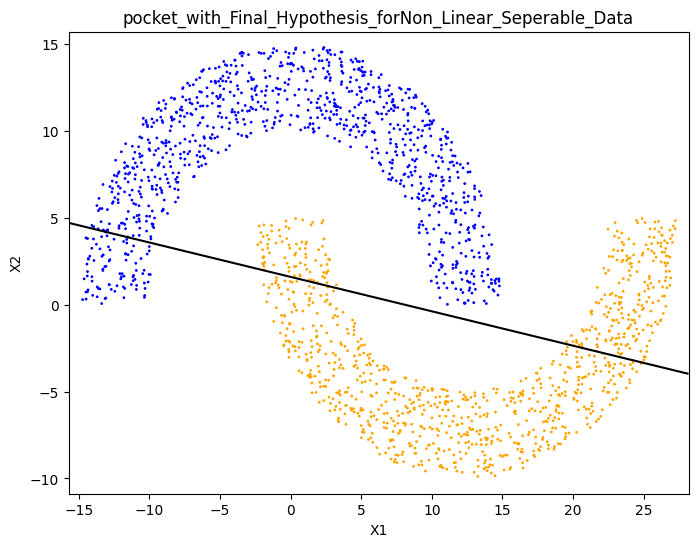

In [266]:
plots(final_weights,"pocket_with_Final_Hypothesis_forNon_Linear_Seperable_Data")

Task 3

In [267]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
Digits_train=pd.read_csv('/content/ZipDigits.train',header=None,delim_whitespace=True)
Digits_test=pd.read_csv('ZipDigits.test',header=None,delim_whitespace=True)

In [268]:
#Data preprocessing
Digits_train=Digits_train[(Digits_train[0]==1) |(Digits_train[0]==5)]
Digits_train=Digits_train.reset_index(drop=True)
Digits_train[0]=Digits_train[0].apply(lambda x:1 if x==1 else-1)
Digits_test=Digits_test[(Digits_test[0]==1) |(Digits_test[0]==5)]
Digits_test=Digits_test.reset_index(drop=True)
Digits_test[0]=Digits_test[0].apply(lambda x:1 if x==1 else-1)

In [269]:
def intensity(image):
  intensity= np.sum(image[1:])
  return intensity
def symmetry(image):
  image=np.array(image).reshape(1,257)
  left=image[:,1:129]
  right=image[:,129:]
  symmetry=np.sum(np.abs(left-np.flip(right)))
  return symmetry
Digits_train['symmetry']=Digits_train.apply(symmetry,axis=1)
Digits_test['symmetry']=Digits_test.apply(symmetry,axis=1)
Digits_train['intensity']=Digits_train.apply(intensity,axis=1)
Digits_test['intensity']=Digits_test.apply(intensity,axis=1)
symmetry_arr=np.array(Digits_train['symmetry'])
intensity=np.array(Digits_train['intensity'])


In [270]:
symmetry_arr_t=np.array(Digits_test['symmetry'])
intensity_t=np.array(Digits_test['intensity'])
lenght = len(symmetry_arr_t)
intercept = np.ones((lenght, 1), dtype=symmetry_arr_t.dtype)
x1_test=np.vstack((intensity_t, symmetry_arr_t.T))
x_test=np.concatenate((intercept, x1_test.T), axis=1)
y_test=np.array(Digits_test[0])

(1561,) (1561,)


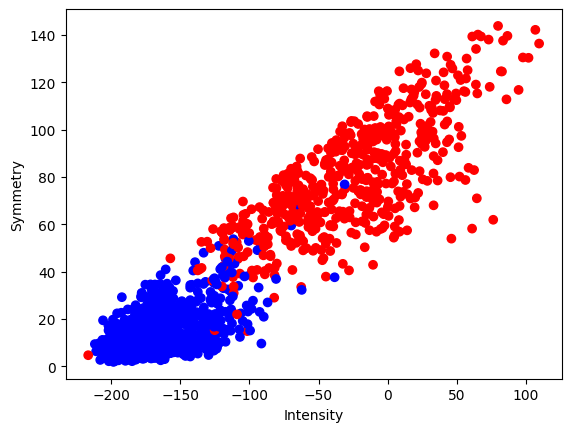

In [271]:
lenght = len(symmetry_arr)
# Create a column vector of ones with the same number of rows
ones_column = np.ones((lenght, 1), dtype=symmetry_arr.dtype)
print(intensity.shape,symmetry_arr.shape)
x1=np.vstack((intensity, symmetry_arr))
x=np.concatenate((ones_column, x1.T), axis=1)
y=np.array(Digits_train[0])
clr=Digits_train[0].map({1:"blue",-1:"red"})
plt.scatter(Digits_train['intensity'],Digits_train['symmetry'],c=clr,label=['1','-1'])
plt.xlabel('Intensity')
plt.ylabel('Symmetry')

plt.show()

In [272]:
def calcFunc(w,x):
  return np.sign(np.dot(w,np.transpose(x)))
def misclass(w,x,y):
  predictions = calcFunc(w, x)
  return np.sum(predictions != y)
def plotq(w,clr,algo):
  m=-w[1] / w[2]
  c = -w[0] / w[2]
  axes=plt.gca()
  xx = np.array(axes.get_xlim())
  yy = m*xx+c
  plt.title("Final Hypothesis "+algo)
  plt.plot(xx, yy, color=clr)

LP1 -A

The final weights are  [  11.    -207.562 -485.542]
Total number of misclassified: 15


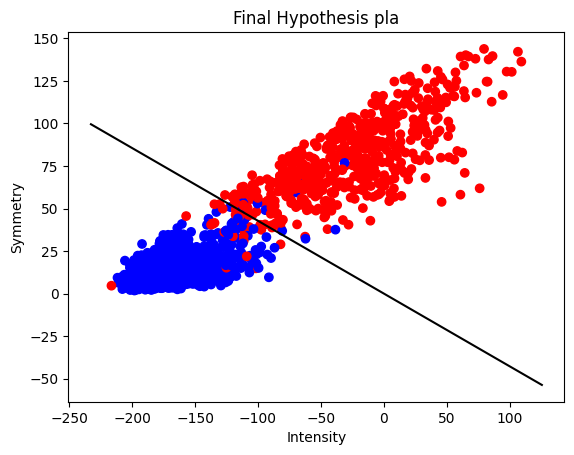

In [273]:
count=0
w=np.array([0,0,0], dtype=float)
plt.scatter(Digits_train['intensity'],Digits_train['symmetry'],c=clr,label=['1','-1'])
plt.xlabel('Intensity')
plt.ylabel('Symmetry')
while count<=1000:
  for i in range(0,len(x)):
    if (y[i]!= np.sign(np.dot(w,np.transpose(x[i])))):
      w+=x[i]*float(y[i])
      count+=1
      if(misclass(w,x,y)==0):
        break
print('The final weights are ', w)
plotq(w,"black","pla")
error_digits_pla_test=misclass(w,x_test,y_test)
print(f"Total number of misclassified: {error_digits_pla_test}")

LP1-B

In [274]:
def pocket(x,y,max_iter):
    j = 0
    error = []
    w=np.zeros(x[0].shape)
    best_w = np.copy(w)
    best_error = misclass(w, x, y)
    while j <= max_iter:
        j += 1
        pred = calcFunc(best_w, x)
        misclassified_ind = np.where(pred != y)[0]
        error.append(misclass(best_w,x,y))
        if len(misclassified_ind) == 0:
            break
        i = np.random.choice(misclassified_ind)
        w += x[i] * y[i]
        new_error = misclass(w,x,y)
        if new_error < best_error:
            best_w = np.copy(w)
            best_error = new_error
    plotq(best_w,"green","Pocket")
    return error,best_w

Total  misclass:  59
[  0.    -42.072 -25.257]


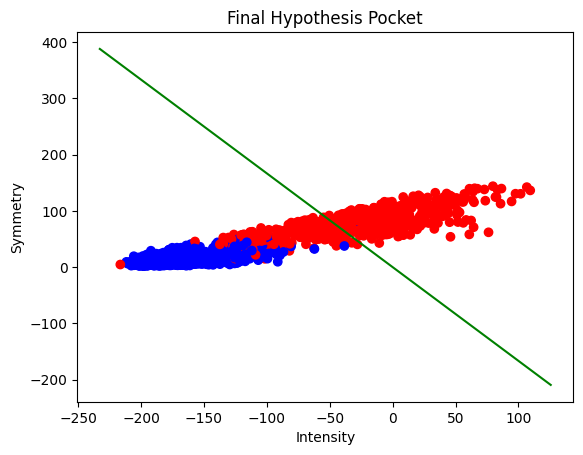

In [275]:
plt.scatter(Digits_train['intensity'],Digits_train['symmetry'],c=clr,label=['1','-1'])
plt.xlabel('Intensity')
plt.ylabel('Symmetry')

error,best_w=pocket(x,y,1000)
print("Total  misclass: ",misclass(best_w,x_test,y_test))
print(best_w)

There are total of 15 - missclassified for PLA algorithm
and 35 - missclassifed for Pocket Algorithm , So PLA has test error less than compared to the Pocket algorithm

Task 3 LP2

Total misclass:  37


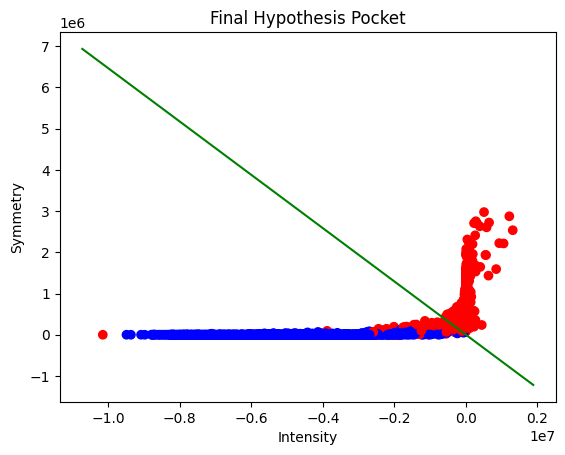

In [276]:
x_cube=x**3
x_test_cube=x_test**3
plt.scatter(x_cube[:,1],x_cube[:,2],c=clr,label=['1','-1'])
plt.xlabel('Intensity')
plt.ylabel('Symmetry')
error,w_pocket_digits=pocket(x_cube,y,1000)
print('Total misclass: ',misclass(w_pocket_digits,x_test_cube,y_test))

In [277]:
def trd_poly(data):
  x1=data[:,1]
  x2=data[:,2]
  third_data=np.vstack([
      np.ones(x1.shape[0]),x1,x2,x1**2,x2**2,x1*x2,x1**3,x2**3,(x1**2)*2 ,x1*(x2**2) ]).T
  return third_data

In [278]:
x3d=trd_poly(x)
x3d_t=trd_poly(x_test)
print(x3d_t)

[[ 1.00000000e+00 -1.31568000e+02  4.25460000e+01 ...  7.70151574e+04
   3.46202772e+04 -2.38159409e+05]
 [ 1.00000000e+00 -2.22920000e+01  6.73900000e+01 ...  3.06045761e+05
   9.93866528e+02 -1.01237159e+05]
 [ 1.00000000e+00 -3.56220000e+01  9.17740000e+01 ...  7.72963493e+05
   2.53785377e+03 -3.00025122e+05]
 ...
 [ 1.00000000e+00  6.32320000e+01  1.22122000e+02 ...  1.82130099e+06
   7.99657165e+03  9.43028319e+05]
 [ 1.00000000e+00  1.22720000e+01  9.44040000e+01 ...  8.41339325e+05
   3.01203968e+02  1.09369478e+05]
 [ 1.00000000e+00 -1.43710000e+02  1.55340000e+01 ...  3.74843429e+03
   4.13051282e+04 -3.46779640e+04]]


In [279]:
import numpy as np

# Pocket Algorithm for binary classification
def pocket_algorithmx(X, Y, max_iterations):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)  # Initialize weights to zeros
    pocket_weights = weights.copy()  # Store the best weights so far
    min_misclassified = num_samples  # Track the minimum misclassified points

    for _ in range(max_iterations):
        misclassified = 0

        for i in range(num_samples):
            prediction = np.sign(np.dot(X[i], weights))
            if prediction == 0:
                prediction = -1  # Convert zero predictions to -1
            if prediction!= Y[i]:
                weights += Y[i] * X[i]
                misclassified += 1

        # Check if this set of weights is better than the best pocket weights
        if misclassified < min_misclassified:
            min_misclassified = misclassified
            pocket_weights = weights.copy()

    return pocket_weights, min_misclassified



max_iterations = 1000
final_weights, error_counts = pocket_algorithmx(x3d,y,1000)

print("Final weights:", final_weights)
print("Number of misclassified points:", error_counts)


Final weights: [-6.90000000e+01 -1.77675740e+04 -1.09607960e+04 -3.10144164e+06
 -4.98221092e+05  3.65184277e+05 -3.05912233e+06 -9.13238770e+06
 -6.20288327e+06  1.20961931e+07]
Number of misclassified points: 46


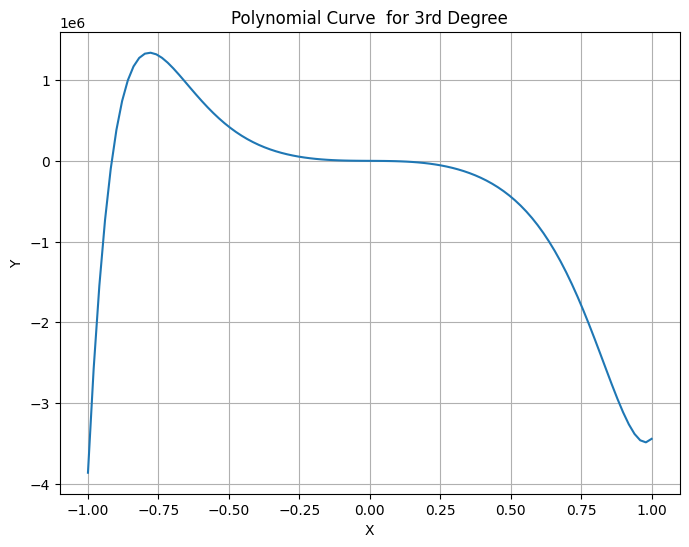

In [290]:
import numpy as np
import matplotlib.pyplot as plt


# Calculate the corresponding y values using the third-order polynomial equation
import numpy as np
import matplotlib.pyplot as plt

# Provided coefficients for specific polynomial terms
weights = [-6.90000000e+01, -1.77675740e+04, -1.09607960e+04, -3.10144164e+06,
           -4.98221092e+05, 3.65184277e+05, 3.05912233e+06, -9.13238770e+06,
           -6.20288327e+06, 1.20961931e+07]

# Define a range of x values
x = np.linspace(-1, 1, 100)  # Adjust the range as needed

# Calculate the corresponding y values using the provided coefficients
y = (
    weights[0] +
    weights[1] * x +
    weights[2] * x**2 +
    weights[3] * x**3 +
    weights[4] * x**4 +
    weights[5] * x**5 +
    weights[6] * x**6 +
    weights[7] * x**7 +
    weights[8] * x**8 +
    weights[9] * x**9
)

# Plot the third-order polynomial curve
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title('Polynomial Curve  for 3rd Degree')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()
